### *Name*: ***Rishi Devanpalli***

## ***Importing the Libraries***

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## ***Importing the Dataset***

In [2]:
dataset = pd.read_csv("churn_data.csv")

In [3]:
dataset

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


In [4]:
dataset.describe()

,year,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
count,2000.0,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1972.000000,2000.000000,1965.000000
mean,2015.0,554887.157500,38.69050,99.750000,270.178425,10.198700,30.620780,100.415500,4.482500,3.250507,1.547000,0.133333
std,0.0,261033.690318,10.20641,39.755386,80.551627,2.785519,9.129165,19.529454,2.487728,0.809084,1.315164,0.340021
min,2015.0,100198.000000,18.00000,1.000000,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,328634.750000,32.00000,73.000000,218.212500,8.400000,24.735000,87.000000,3.000000,3.000000,1.000000,0.000000
50%,2015.0,567957.500000,37.00000,99.000000,269.925000,10.200000,30.590000,101.000000,4.000000,3.000000,1.000000,0.000000
75%,2015.0,773280.250000,44.00000,127.000000,324.675000,12.000000,36.797500,114.000000,6.000000,4.000000,2.000000,0.000000
max,2015.0,999961.000000,82.00000,243.000000,526.200000,20.000000,59.640000,175.000000,19.000000,6.000000,9.000000,1.000000


## ***Checking for any Missing Data***

In [5]:
dataset.isnull().sum()

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [6]:
dataset['gender'].mode()[0]

'Male'

In [7]:
dataset['maximum_days_inactive'].mode()[0]

3.0

In [8]:
dataset['churn'].mode()[0]

0.0

In [9]:
dataset['gender'] = dataset['gender'].fillna(dataset['gender'].mode()[0])
dataset['maximum_days_inactive'] = dataset['maximum_days_inactive'].fillna(dataset['maximum_days_inactive'].mode()[0])
dataset['churn'] = dataset['churn'].fillna(dataset['churn'].mode()[0])

In [10]:
dataset.isnull().sum()

year                      0
customer_id               0
phone_no                  0
gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64

## ***Encoding Categorical Data***

In [11]:
dataset['gender'] = dataset['gender'].map({'Male' : 1, 'Female' : 0})
dataset['multi_screen'] = dataset['multi_screen'].map({'no' : 0, 'yes' : 1})
dataset['mail_subscribed'] = dataset['mail_subscribed'].map({'yes' : 1, 'no' : 0})

In [12]:
dataset['gender'].value_counts()

1    1077
0     923
Name: gender, dtype: int64

In [13]:
dataset['multi_screen'].value_counts()

0    1802
1     198
Name: multi_screen, dtype: int64

In [14]:
dataset['mail_subscribed'].value_counts()

0    1430
1     570
Name: mail_subscribed, dtype: int64

## ***Dropping off the columns that do not help in predictions***

In [15]:
dataset.drop(['customer_id', 'phone_no','age', 'customer_support_calls'], axis=1, inplace=True)

In [16]:
dataset

,year,gender,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,churn
0,2015,0,62,0,0,148.35,12.2,16.81,82,1,4.0,0.0
1,2015,0,149,0,0,294.45,7.7,33.37,87,3,3.0,0.0
2,2015,0,126,0,0,87.30,11.9,9.89,91,1,4.0,1.0
3,2015,0,131,0,1,321.30,9.5,36.41,102,4,3.0,0.0
4,2015,0,191,0,0,243.00,10.9,27.54,83,7,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,0,75,0,1,182.25,11.3,20.66,97,5,4.0,0.0
1996,2015,1,127,0,0,273.45,9.3,30.99,116,3,3.0,0.0
1997,2015,1,94,0,0,128.85,15.6,14.60,110,16,5.0,0.0
1998,2015,1,94,0,0,178.05,10.4,20.18,100,6,3.0,0.0


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   2000 non-null   int64  
 1   gender                 2000 non-null   int64  
 2   no_of_days_subscribed  2000 non-null   int64  
 3   multi_screen           2000 non-null   int64  
 4   mail_subscribed        2000 non-null   int64  
 5   weekly_mins_watched    2000 non-null   float64
 6   minimum_daily_mins     2000 non-null   float64
 7   maximum_daily_mins     2000 non-null   float64
 8   weekly_max_night_mins  2000 non-null   int64  
 9   videos_watched         2000 non-null   int64  
 10  maximum_days_inactive  2000 non-null   float64
 11  churn                  2000 non-null   float64
dtypes: float64(5), int64(7)
memory usage: 187.6 KB


<AxesSubplot:xlabel='gender', ylabel='count'>

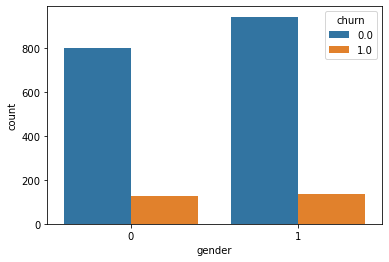

In [18]:
sns.countplot(x='gender', hue='churn', data=dataset)

In [28]:
target_instance = dataset["churn"].value_counts().to_frame()
target_instance = target_instance.reset_index()
target_instance = target_instance.rename(columns={'index': 'Category'})
fig = px.pie(target_instance, values='churn', names='Category', color_discrete_sequence=["green", "red"],
             title='Distribution of Churn')
fig.show()

### ***Churn: Yes---> 13.1%***
### ***Churn: No---> 86.9%***

***Checking for Correlation***

In [29]:
# Checking the correlation between features
# Correlation measures the linear relationship between two variables.
# Features with high correlation are more linearly dependent and have almost the same effect on the dependent variable.
corr = dataset.corr()

fig = px.imshow(corr,width=1000, height=1000)
fig.show()

Text(0.5, 1.0, 'Class Distributions \n (0: No Churn || 1: Chrun)')

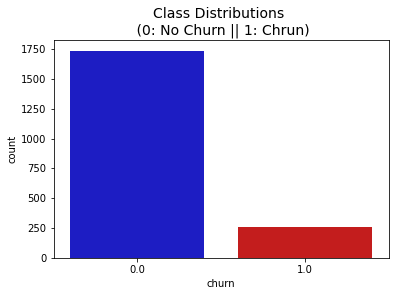

In [30]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(x='churn', data=dataset, palette=colors)
plt.title('Class Distributions \n (0: No Churn || 1: Chrun)', fontsize=14)

*As you can see the data is imbalanced and therefore we use Random UpSampling to balance the data*

In [31]:
no_churn_dataset = dataset[dataset.churn == 0]
churn_dataset = dataset[dataset.churn == 1]

In [32]:
churn_upsampled = churn_dataset.sample(n=len(no_churn_dataset), replace=True, random_state=42)
churn_upsampled.shape

(1738, 12)

Text(0.5, 1.0, 'Class Distributions \n (0: No Churn || 1: Chrun)')

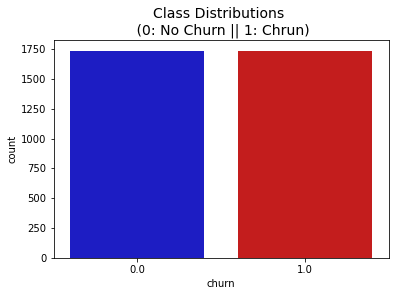

In [33]:
colors = ["#0101DF", "#DF0101"]

new_dataset = pd.concat([no_churn_dataset, churn_upsampled]).reset_index(drop=True)
sns.countplot(x='churn', data=new_dataset, palette=colors).set_title('Class Distributions \n (0: No Churn || 1: Chrun)', fontsize=14)

*Now the data is balanced and we can now train the model*

In [36]:
target_instance = new_dataset["churn"].value_counts().to_frame()
target_instance = target_instance.reset_index()
target_instance = target_instance.rename(columns={'index': 'Category', 'churn': 'Count'})
fig = px.pie(target_instance, values='Count', names='Category', color_discrete_sequence=["green", "red"],
             title='Distribution of Churn')
fig.show()

## ***Splitting Dataset into Training and Testing set***

In [37]:
x = new_dataset.drop('churn', axis = 1)
y = new_dataset['churn']

In [38]:
y.value_counts()

0.0    1738
1.0    1738
Name: churn, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [41]:
x_train

,year,gender,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive
2677,2015,0,224,1,0,257.25,5.0,29.16,102,2,2.0
1204,2015,1,143,0,1,279.90,11.6,31.72,138,5,4.0
2955,2015,0,140,0,0,180.45,7.7,20.45,74,3,3.0
2266,2015,1,122,0,1,262.35,13.5,29.73,116,3,4.0
611,2015,1,69,0,0,275.10,9.0,31.18,94,5,3.0
...,...,...,...,...,...,...,...,...,...,...,...
1095,2015,0,125,0,0,305.10,11.0,34.58,113,4,3.0
1130,2015,1,139,0,0,247.50,12.6,28.05,128,8,4.0
1294,2015,1,63,0,1,213.45,6.6,24.19,91,8,2.0
860,2015,0,174,0,0,186.45,15.5,21.13,115,5,5.0


In [42]:
y_train

2677    1.0
1204    0.0
2955    1.0
2266    1.0
611     0.0
       ... 
1095    0.0
1130    0.0
1294    0.0
860     0.0
3174    1.0
Name: churn, Length: 2780, dtype: float64

### ***Logistic Regression***

In [43]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0, max_iter = 1500)

In [44]:
lr.fit(x_train, y_train)
lr_y_pred = lr.predict(x_test)

In [45]:
# Performance Metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, lr_y_pred))

              precision    recall  f1-score   support

         0.0       0.72      0.77      0.75       364
         1.0       0.73      0.67      0.70       332

    accuracy                           0.72       696
   macro avg       0.72      0.72      0.72       696
weighted avg       0.72      0.72      0.72       696



In [46]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, lr_y_pred)
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, lr_y_pred))
confusion_matrix.index = ['Actual Churn','Actual No Churn']
confusion_matrix.columns = ['Predicted Churn','Predicted No Churn']
print(confusion_matrix)

                 Predicted Churn  Predicted No Churn
Actual Churn                 281                  83
Actual No Churn              109                 223


### ***K-Nearest Neighbors***

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

In [48]:
knn.fit(x_train, y_train)
knn_y_pred = knn.predict(x_test)

In [49]:
# Performance Metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.73      0.82       364
         1.0       0.76      0.95      0.85       332

    accuracy                           0.83       696
   macro avg       0.85      0.84      0.83       696
weighted avg       0.86      0.83      0.83       696



In [50]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, knn_y_pred)
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, knn_y_pred))
confusion_matrix.index = ['Actual Churn','Actual No Churn']
confusion_matrix.columns = ['Predicted Churn','Predicted No Churn']
print(confusion_matrix)

                 Predicted Churn  Predicted No Churn
Actual Churn                 264                 100
Actual No Churn               15                 317


### ***Naive Bayes Classifier***

In [51]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [52]:
nb.fit(x_train, y_train)
nb_y_pred = nb.predict(x_test)

In [53]:
# Performance Metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, nb_y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.88      0.80       364
         1.0       0.83      0.64      0.73       332

    accuracy                           0.77       696
   macro avg       0.78      0.76      0.76       696
weighted avg       0.78      0.77      0.76       696



In [54]:
nb_acc = accuracy_score(y_test, nb_y_pred)
nb_acc

0.7672413793103449

In [55]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, nb_y_pred)
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, nb_y_pred))
confusion_matrix.index = ['Actual Churn','Actual No Churn']
confusion_matrix.columns = ['Predicted Churn','Predicted No Churn']
print(confusion_matrix)

                 Predicted Churn  Predicted No Churn
Actual Churn                 320                  44
Actual No Churn              118                 214


### ***Support Vector Machine***

In [56]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 0)

In [57]:
svc.fit(x_train, y_train)
svc_y_pred = svc.predict(x_test)

In [58]:
# Performance Metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, svc_y_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.63      0.66       364
         1.0       0.64      0.72      0.67       332

    accuracy                           0.67       696
   macro avg       0.67      0.67      0.67       696
weighted avg       0.67      0.67      0.67       696



In [59]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, svc_y_pred)
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, svc_y_pred))
confusion_matrix.index = ['Actual Churn','Actual No Churn']
confusion_matrix.columns = ['Predicted Churn','Predicted No Churn']
print(confusion_matrix)

                 Predicted Churn  Predicted No Churn
Actual Churn                 228                 136
Actual No Churn               94                 238


### ***Random Forest CLassifier***

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 250, random_state = 0)

In [61]:
rf.fit(x_train, y_train)
rf_y_pred = rf.predict(x_test)

In [62]:
# Performance Metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98       364
         1.0       0.97      1.00      0.98       332

    accuracy                           0.98       696
   macro avg       0.98      0.98      0.98       696
weighted avg       0.98      0.98      0.98       696



In [63]:
from sklearn.metrics import accuracy_score

rf_y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, rf_y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9827586206896551


In [64]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, rf_y_pred)
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, rf_y_pred))
confusion_matrix.index = ['Actual Churn','Actual No Churn']
confusion_matrix.columns = ['Predicted Churn','Predicted No Churn']
print(confusion_matrix)

                 Predicted Churn  Predicted No Churn
Actual Churn                 353                  11
Actual No Churn                1                 331


### ***Using Cross-Validation to check for Overfitting***


In [65]:
from sklearn.model_selection import cross_validate
cv_rf = cross_validate(rf, x_train, y_train, scoring = "accuracy",  cv= 10)
cv_rf

{'fit_time': array([1.0615921 , 1.0208199 , 1.0182817 , 1.03829074, 1.08571434,
        1.04050374, 0.78935814, 0.76753235, 0.80578184, 0.75792313]),
 'score_time': array([0.04901958, 0.03216767, 0.05520535, 0.03220391, 0.04288816,
        0.03341222, 0.03853774, 0.02961445, 0.02866602, 0.03079438]),
 'test_score': array([0.98201439, 0.98920863, 0.98561151, 0.98561151, 0.98920863,
        0.9676259 , 0.97122302, 0.95683453, 0.97841727, 0.98561151])}

**Accuracy Scores**


*   Logistics Regression - 0.72
*   K-Nearest Neighbors - 0.83    
*   Random Forest Classifier - 0.98
*   Support Vector Classifier - 0.68
*   Naive Bayes Classifier - 0.83


**Maximum Accuracy: Random Forest Classifier- 0.98**

*From the selected performance metrics, the **Random Forest Classifier** algorithm has the highest scores across all chosen metrics. It can be improved with various techniques, but we’ll quickly improve it with hyperparameter tuning (Random search).*

### ***Using GridSearchCV OR RandomizedSearchCV***

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [67]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000, 10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 4, 10, 12, 16, 18, 25]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10, 25, 50, 70]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [68]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion' : ['entropy', 'gini'],
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 4, 10, 12, 16, 18, 25], 'min_samples_leaf': [1, 2, 5, 10, 25, 50, 70], 'criterion': ['entropy', 'gini'], 'bootstrap': [True, False]}


In [69]:
rf_Model = RandomForestClassifier()

In [70]:
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, n_iter = 200, cv = 3, verbose=2, random_state = 42, n_jobs = -1)

In [71]:
rf_RandomGrid.fit(x_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10, 25,
                                                             50, 70],
                                        'min_samples_split': [2, 4, 10, 12, 16,
                                                              18, 25],
                                        'n_estimators': [200, 400, 600, 800,
                           

In [72]:
rf_RandomGrid.best_params_

{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 1000,
 'criterion': 'gini',
 'bootstrap': False}

In [73]:
# Testing new Parameters for Random Forest
rf_rs_clf = RandomForestClassifier(criterion = "gini", max_depth = 1000, min_samples_leaf = 1, min_samples_split = 2, max_features='log2', bootstrap = False,
                                  random_state=42, n_jobs=4, n_estimators = 2000)

rf_rs_clf.fit(x_train, y_train)
rf_rs_clf_pred = rf_rs_clf.predict(x_test)

# Performance Metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_rs_clf_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       364
         1.0       0.98      1.00      0.99       332

    accuracy                           0.99       696
   macro avg       0.99      0.99      0.99       696
weighted avg       0.99      0.99      0.99       696



In [74]:
rf_rs_clf_pred = rf_rs_clf.predict(x_test)
accuracy = accuracy_score(y_test, rf_rs_clf_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9870689655172413


***The model slightly improved from:***

1.   *Old Accuracy : 98.27%*
2.   *New Accuracy : 98.70%*

### ***Joblib***

In [75]:
#Saving best model
import joblib

In [76]:
# #Creating Churn Prediction Joblib model based on the most accurate model

joblib.dump(rf_rs_clf, 'Churn Prediction')

['Churn Prediction']

In [ ]:
#Creating Churn Prediction Joblib model based on the most accurate model

joblib.dump(rf, 'Churn Prediction')

In [77]:
#Loading the Churn Prediction Joblib model

model = joblib.load('Churn Prediction')

### ***Streamlit WebApp***

In [78]:
!pip3 install streamlit --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.11.0 requires absl-py>=1.0.0, but you have absl-py 0.15.0 which is incompatible.
tensorflow-intel 2.11.0 requires flatbuffers>=2.0, but you have flatbuffers 1.12 which is incompatible.
tensorflow-intel 2.11.0 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
tensorflow-intel 2.11.0 requires tensorflow-estimator<2.12,>=2.11.0, but you have tensorflow-estimator 2.5.0 which is incompatible.


In [82]:
#Running app.py

!streamlit run churn-app.py  & npx localtunnel --port 8501

^C


In [83]:
# Run the churn-app.py then run the above code cell